<a href="https://colab.research.google.com/github/harryrosianto/KombyteCompetition/blob/main/KomByte_Data_Generate_Excel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import random
from faker import Faker
from datetime import datetime, timedelta
import uuid

random.seed(42)
fake = Faker()

#define lists of possible values
games = ["Call of Duty", "FIFA", "Grand Theft Auto", "The Legend of Zelda", "Minecraft",
         "Fortnite", "Overwatch", "Assassin's Creed", "Pokemon", "League of Legends",
         "Counter-Strike", "World of Warcraft", "Madden NFL", "Super Mario", "Battlefield"]

platforms = ["PS4", "XBox One", "Nintendo Switch", "PC", "PS5", "Mobile"]

publishers = ["Activision", "Electronic Arts", "Rockstar Games", "Nintendo", "Microsoft",
              "Epic Games", "Blizzard Entertainment", "Ubisoft", "Nintendo", "Valve"]

developers = ["Infinity Ward", "EA Sports", "Rockstar North", "Nintendo EAD", "Epic Games",
              "Blizzard Entertainment", "Ubisoft Montreal", "Game Freak", "Valve", "Respawn Entertainment"]

genres = ["First Person Shooter", "Role Playing", "Sports", "Simulation", "Strategy"]

regions = ["Asia", "America", "Europe"]

data_record = 5000

#generate dataset here
data = {
    "Transaction_ID": [str(uuid.uuid4())[:8] for _ in range(data_record)],
    "Name": [random.choice(games) for _ in range(data_record)],
    "Platform": [random.choice(platforms) for _ in range(data_record)],
    "Publisher": [random.choice(publishers) for _ in range(data_record)],
    "Developer": [random.choice(developers) for _ in range(data_record)],
    "Genre": [random.choice(genres) for _ in range(data_record)],
    "Release_Date": [fake.date_time_between(start_date="-5y", end_date="now").strftime('%Y-%m-%d') for _ in range(data_record)],
    "Selling_Price": [round(random.uniform(20, 60), 2) for _ in range(data_record)],
    "Discount": [random.randint(0, 50) for _ in range(data_record)],
    "Region_Sales": [random.choice(regions) for _ in range(data_record)]
}

#generate sales dates for last 5 years
end_date = datetime.now()
data['Sales_Date'] = [fake.date_time_between_dates(datetime_start=end_date - timedelta(days=365*5), datetime_end=end_date).strftime('%Y-%m-%d') for _ in range(5000)]

data['Rating'] = [random.randint(1, 10) for _ in range(data_record)]

df = pd.DataFrame(data)
df.to_csv('video_game_sales_dataset.csv', index=False)

print("Dataset generated successfully and saved as 'video_game_sales_dataset.csv'.")


Dataset generated successfully and saved as 'video_game_sales_dataset.csv'.


In [ ]:
print(df.head())

  Transaction_ID               Name  Platform               Publisher  \
0       36636d30     Counter-Strike    Mobile         Electronic Arts   
1       f025d46b               FIFA    Mobile               Microsoft   
2       ac41c5da       Call of Duty  XBox One  Blizzard Entertainment   
3       578308cc  World of Warcraft       PS4          Rockstar Games   
4       759f1504          Minecraft       PS4                 Ubisoft   

                Developer                 Genre Release_Date  Selling_Price  \
0        Ubisoft Montreal          Role Playing   2020-09-04          32.08   
1              Epic Games            Simulation   2019-05-12          53.66   
2            Nintendo EAD  First Person Shooter   2023-01-26          22.34   
3  Blizzard Entertainment                Sports   2020-12-08          29.14   
4           Infinity Ward          Role Playing   2020-07-28          51.76   

   Discount Region_Sales  Sales_Date  Rating  
0        34         Asia  2024-01-06   

In [ ]:
# Load the dataset
df = pd.read_csv('video_game_sales_dataset.csv')

duplicate_rows = df[df.duplicated()]

print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
Empty DataFrame
Columns: [Transaction_ID, Name, Platform, Publisher, Developer, Genre, Release_Date, Selling_Price, Discount, Region_Sales, Sales_Date, Rating]
Index: []


In [ ]:
#Task 1 calculate the total revenue, average selling price, minimum selling price, and maximum selling price of video games across different platforms and regions

df['Revenue'] = df['Selling_Price'] * (1 - df['Discount'] / 100)

grouped = df.groupby(['Platform', 'Region_Sales']).agg({
    'Revenue': ['sum', 'mean', 'min', 'max']
}).reset_index()

grouped.columns = ['Platform', 'Region_Sales', 'Total_Revenue', 'Average_Selling_Price', 'Minimum_Selling_Price', 'Maximum_Selling_Price']

print(grouped)


           Platform Region_Sales  Total_Revenue  Average_Selling_Price  \
0            Mobile      America      9016.4340              30.054780   
1            Mobile         Asia      8496.9594              29.606130   
2            Mobile       Europe      8453.6050              29.251228   
3   Nintendo Switch      America      7901.4650              29.929792   
4   Nintendo Switch         Asia      9068.6795              30.228932   
5   Nintendo Switch       Europe      7012.9807              28.860003   
6                PC      America      8328.5163              29.120686   
7                PC         Asia      7998.6688              31.244800   
8                PC       Europe      8157.4082              29.133601   
9               PS4      America      7745.6777              28.794341   
10              PS4         Asia      7792.2024              28.438695   
11              PS4       Europe      8209.9781              30.073180   
12              PS5      America      

In [ ]:
#Task 2 calculate the total discount amount applied to each transaction

df['Discount_Amount'] = df['Selling_Price'] * (df['Discount'] / 100)

df['Final_Transaction_Amount'] = df['Selling_Price'] - df['Discount_Amount']

print(df[['Transaction_ID', 'Selling_Price', 'Discount', 'Discount_Amount', 'Final_Transaction_Amount']])


     Transaction_ID  Selling_Price  Discount  Discount_Amount  \
0          36636d30          32.08        34          10.9072   
1          f025d46b          53.66        49          26.2934   
2          ac41c5da          22.34        11           2.4574   
3          578308cc          29.14         7           2.0398   
4          759f1504          51.76        22          11.3872   
...             ...            ...       ...              ...   
4995       7b24995f          26.28        29           7.6212   
4996       2dd72304          25.55        29           7.4095   
4997       34b56532          25.24        42          10.6008   
4998       57f11038          32.08        27           8.6616   
4999       aa7ca944          36.29         3           1.0887   

      Final_Transaction_Amount  
0                      21.1728  
1                      27.3666  
2                      19.8826  
3                      27.1002  
4                      40.3728  
...                  

In [ ]:
#Task 3 total revenue per region pivot

df['Revenue'] = df['Selling_Price'] * (1 - df['Discount'] / 100)

pivot_table = pd.pivot_table(df, index='Genre', columns='Region_Sales', values='Revenue', aggfunc='sum', fill_value=0)

print("Pivot Table - Total Revenue by Game Genre and Region:")
print(pivot_table)


Pivot Table - Total Revenue by Game Genre and Region:
Region_Sales             America        Asia      Europe
Genre                                                   
First Person Shooter  10679.8428   9952.7283  10255.9203
Role Playing          10685.4316   9825.3232  10686.1740
Simulation             9005.2417   9587.3306   9707.7343
Sports                 8552.5407   9743.8342   9680.2550
Strategy              10508.7491  10339.2204   9438.4825


In [ ]:
#Task 4
import pandas as pd

df['Revenue'] = df['Selling_Price'] * (1 - df['Discount'] / 100)

grouped = df.groupby(['Name', 'Platform', 'Publisher']).agg({'Revenue': 'sum'}).reset_index()

# Sort by total revenue in descending order to identify top-selling games
top_selling_games = grouped.sort_values(by='Revenue', ascending=False)

# Filter top-selling games by platform (e.g., PS4)
top_selling_games_ps4 = top_selling_games[top_selling_games['Platform'] == 'PS4']

# Filter top-selling games by publisher (e.g., Electronic Arts)
top_selling_games_ea = top_selling_games[top_selling_games['Publisher'] == 'Electronic Arts']

# Analyze the performance of top-selling games over time (e.g., by release date)
performance_over_time = df.groupby(['Name', 'Release_Date']).agg({'Revenue': 'sum'}).reset_index()

# Display the results
print("Top Selling Games by Platform (PS4):")
print(top_selling_games_ps4)
print("\nTop Selling Games by Publisher (Electronic Arts):")
print(top_selling_games_ea)
print("\nPerformance of Top Selling Games Over Time:")
print(performance_over_time)


Top Selling Games by Platform (PS4):
                  Name Platform               Publisher   Revenue
246               FIFA      PS4                Nintendo  460.7423
568          Overwatch      PS4                Nintendo  400.6274
139       Call of Duty      PS4                Nintendo  369.8901
461         Madden NFL      PS4                Nintendo  354.3662
463         Madden NFL      PS4                 Ubisoft  349.2503
..                 ...      ...                     ...       ...
404  League of Legends      PS4         Electronic Arts   50.0912
356   Grand Theft Auto      PS4                   Valve   47.1846
618            Pokemon      PS4  Blizzard Entertainment   44.2142
355   Grand Theft Auto      PS4                 Ubisoft   37.0151
405  League of Legends      PS4              Epic Games   36.5574

[132 rows x 4 columns]

Top Selling Games by Publisher (Electronic Arts):
                  Name         Platform        Publisher   Revenue
763  World of Warcraft  Ninte

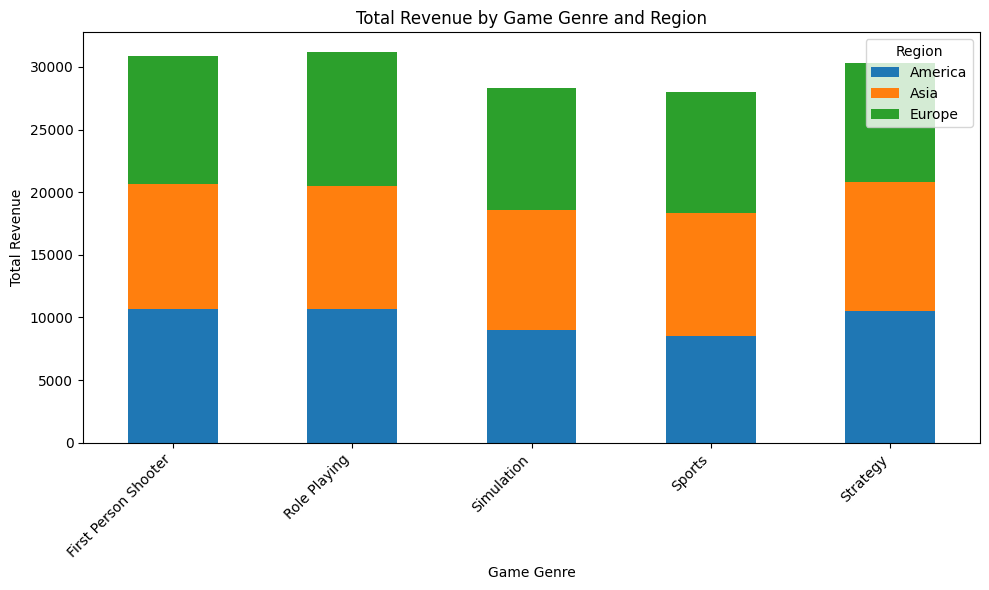

In [ ]:
#Task 5 Total Revenue by Game Genre and Region

import matplotlib.pyplot as plt

grouped = df.groupby(['Genre', 'Region_Sales']).agg({'Revenue': 'sum'}).reset_index()

pivot_table = grouped.pivot(index='Genre', columns='Region_Sales', values='Revenue')

#plotting
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Total Revenue by Game Genre and Region')
plt.xlabel('Game Genre')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region')
plt.tight_layout()
plt.show()


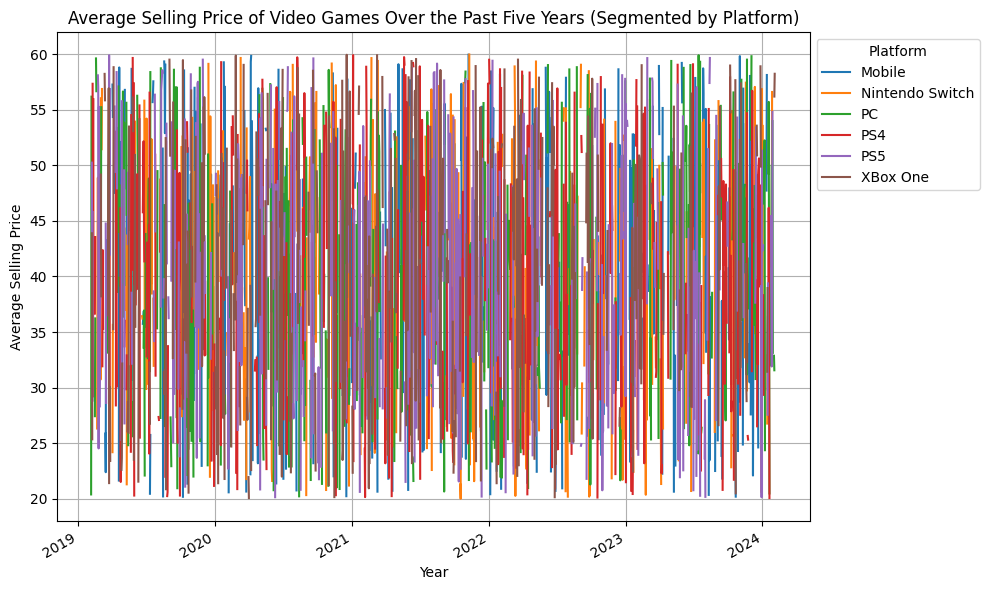

In [ ]:
#Task 6 Average Selling Price of Video Games Over the Past Five Years (Segmented by Platform

df['Release_Date'] = pd.to_datetime(df['Release_Date'])

recent_data = df[df['Release_Date'] >= (df['Release_Date'].max() - pd.DateOffset(years=5))]
grouped = recent_data.groupby(['Release_Date', 'Platform']).agg({'Selling_Price': 'mean'}).reset_index()
pivot_table = grouped.pivot(index='Release_Date', columns='Platform', values='Selling_Price')

#plotting
pivot_table.plot(kind='line', figsize=(10, 6))
plt.title('Average Selling Price of Video Games Over the Past Five Years (Segmented by Platform)')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.legend(title='Platform', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


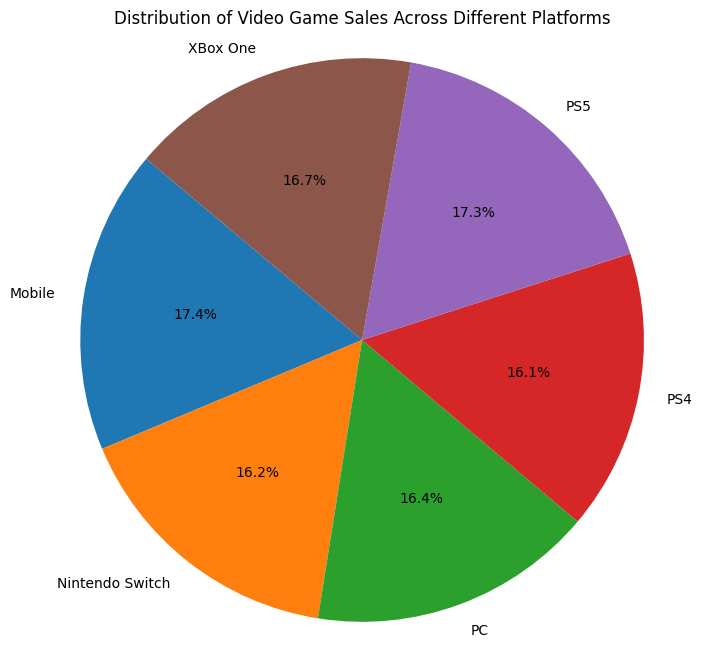

In [ ]:
#Task 7 Distribution of Video Game Sales Across Different Platforms

platform_sales = df.groupby('Platform')['Selling_Price'].sum()

#plotting
plt.figure(figsize=(8, 8))
plt.pie(platform_sales, labels=platform_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Video Game Sales Across Different Platforms')
plt.axis('equal')  #equal aspect ratio
plt.show()


In [ ]:
#Task 8
#let's assume you have another dataset containing information about publishers and developers
#load the dataset containing publisher and developer information
publisher_developer_df = pd.read_csv('publisher_developer_info.csv')

#merge the two datasets based on the 'Name' column, which represents the video game name
merged_df = pd.merge(df, publisher_developer_df, on='Name', how='left')

#display the resulting DataFrame with publisher and developer information
print(merged_df[['Name', 'Platform_x', 'Publisher_x', 'Developer_x']])


                      Name Platform_x      Publisher_x       Developer_x
0           Counter-Strike     Mobile  Electronic Arts  Ubisoft Montreal
1           Counter-Strike     Mobile  Electronic Arts  Ubisoft Montreal
2           Counter-Strike     Mobile  Electronic Arts  Ubisoft Montreal
3           Counter-Strike     Mobile  Electronic Arts  Ubisoft Montreal
4           Counter-Strike     Mobile  Electronic Arts  Ubisoft Montreal
...                    ...        ...              ...               ...
1673259  World of Warcraft         PC       Epic Games        Epic Games
1673260  World of Warcraft         PC       Epic Games        Epic Games
1673261  World of Warcraft         PC       Epic Games        Epic Games
1673262  World of Warcraft         PC       Epic Games        Epic Games
1673263  World of Warcraft         PC       Epic Games        Epic Games

[1673264 rows x 4 columns]


In [ ]:
#Task 9 Implement SUMIF/SUMIFS

df['Revenue'] = df['Selling_Price'] * (1 - df['Discount'] / 100)

#define the specific publisher or developer
target_publisher = 'Ubisoft'
target_developer = 'Valve'

#calculate total revenue for games published by the specific company
total_revenue_publisher = df.loc[df['Publisher'] == target_publisher, 'Revenue'].sum()

#calculate total revenue for games developed by the specific studio
total_revenue_developer = df.loc[df['Developer'] == target_developer, 'Revenue'].sum()

#display the total revenue
print(f"Total revenue generated by games published by {target_publisher}: {total_revenue_publisher}")
print(f"Total revenue generated by games developed by {target_developer}: {total_revenue_developer}")


Total revenue generated by games published by Ubisoft: 15121.1862
Total revenue generated by games developed by Valve: 14114.399000000001


In [ ]:
#Task 10 define a function to categorize video games into different genres based on predefined criteria
def categorize_genre(genre):
    if 'Shooter' in genre:
        return 'First Person Shooter'
    elif 'Role Playing' in genre:
        return 'Role Playing'
    elif 'Sports' in genre:
        return 'Sports'
    elif 'Simulation' in genre:
        return 'Simulation'
    elif 'Strategy' in genre:
        return 'Strategy'
    else:
        return 'Other'

#apply the categorize_genre function to create a new column 'Categorized_Genre'
df['Categorized_Genre'] = df['Genre'].apply(categorize_genre)

#display the first few rows of the DataFrame with the categorized genre
print(df[['Name', 'Genre', 'Categorized_Genre']].head())


                Name                 Genre     Categorized_Genre
0     Counter-Strike          Role Playing          Role Playing
1               FIFA            Simulation            Simulation
2       Call of Duty  First Person Shooter  First Person Shooter
3  World of Warcraft                Sports                Sports
4          Minecraft          Role Playing          Role Playing


In [ ]:
#Task 11 apply number formatting to display revenue figures in currency format (USD)
styled_df = df.style.format({'Revenue': '${:,.2f}'})

# Display the styled DataFrame
styled_df

